In [1]:
# Import essential libraries for data handling, model building, and evaluation

import numpy as np # Data manipulation and analysis
import pandas as pd # Numerical computations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split # Data splitting
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.preprocessing import StandardScaler # Data scaling
from sklearn.metrics import classification_report, accuracy_score  # Metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Random Forest models
from sklearn.metrics import roc_auc_score, roc_curve # ROC metrics
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.multioutput import MultiOutputRegressor # For multi-output regression tasks
from sklearn.metrics import mean_absolute_error, r2_score # Regression metrics
from xgboost import XGBRegressor


In [2]:
# Load the dataset
data = pd.read_csv('county_census_and_election_result.csv')

print(data.shape)#the shape of the dataset

data.head() #Display the first few rows of the dataset to understand its structure

(7526, 45)


,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Display information about the dataset structure, data types, and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7526 entries, 0 to 7525
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  7526 non-null   int64  
 1   county_fips           7526 non-null   int64  
 2   inctot                7526 non-null   float64
 3   mortamt1              7526 non-null   float64
 4   avrg_age              7526 non-null   float64
 5   ftotinc               7526 non-null   float64
 6   foodstmp_1_freq       7526 non-null   float64
 7   foodstmp_2_freq       7526 non-null   float64
 8   sex_2_freq            7526 non-null   float64
 9   sex_1_freq            7526 non-null   float64
 10  marst_5_freq          7526 non-null   float64
 11  marst_6_freq          7526 non-null   float64
 12  marst_1_freq          7526 non-null   float64
 13  marst_4_freq          7526 non-null   float64
 14  marst_3_freq          7526 non-null   float64
 15  marst_2_freq         

In [4]:
# Identify missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
year                       0
county_fips                0
inctot                     0
mortamt1                   0
avrg_age                   0
ftotinc                    0
foodstmp_1_freq            0
foodstmp_2_freq            0
sex_2_freq                 0
sex_1_freq                 0
marst_5_freq               0
marst_6_freq               0
marst_1_freq               0
marst_4_freq               0
marst_3_freq               0
marst_2_freq               0
race_1_freq                0
race_2_freq                0
race_7_freq                0
race_8_freq                0
race_5_freq                0
race_6_freq                0
race_3_freq                0
race_4_freq                0
race_9_freq                0
ctz_stat_1_freq            0
ctz_stat_3_freq            0
ctz_stat_2_freq            0
lang_1_freq                0
lang_2_freq                0
educ_attain_2.0_freq       0
educ_attain_1.0_freq       0
educ_attain_3.0_freq       0
educ_attain_

In [5]:
select_data = data.loc[data['year'].isin([2008,2012,2016,2020])]
select_data =  select_data.reset_index(drop = True)

select_data

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,41.6,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,43.5,2.4,AL,BALDWIN,19386.0,0.0,0.0,756.0,61271.0,1.0
2,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,41.1,4.5,AL,CALHOUN,16334.0,0.0,0.0,560.0,32348.0,1.0
3,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,46.8,2.9,AL,ETOWAH,13497.0,0.0,0.0,645.0,30595.0,1.0
4,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,38.1,3.4,AL,JEFFERSON,166121.0,0.0,0.0,2482.0,149921.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,42.3,1.4,WI,SHEBOYGAN,27101.0,2.0,896.0,403.0,37609.0,1.0
1854,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,37.6,0.8,WI,WALWORTH,22789.0,15.0,641.0,304.0,33851.0,1.0
1855,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,37.3,2.0,WI,WAUKESHA,103906.0,54.0,3023.0,1364.0,159649.0,1.0
1856,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,41.5,1.6,WI,WINNEBAGO,44060.0,38.0,1629.0,509.0,47796.0,1.0


In [6]:
select_data.isna().sum()

,0
year,0
county_fips,0
inctot,0
mortamt1,0
avrg_age,0
ftotinc,0
foodstmp_1_freq,0
foodstmp_2_freq,0
sex_2_freq,0
sex_1_freq,0


In [7]:
select_data[select_data['county_name'].isna()]

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,41.6,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2008,2000,28443.2,864.7,42.8,60503.4,86.3,13.7,47.0,53.0,...,29.8,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2008,4000,20395.4,760.4,47.8,42735.9,87.4,12.6,49.7,50.3,...,48.9,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2008,5000,20019.4,530.1,47.5,40867.5,88.0,12.0,52.8,47.2,...,43.1,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2008,6000,25572.1,1151.1,46.4,51230.1,94.4,5.6,48.7,51.3,...,42.5,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2020,51000,33447.3,1140.5,48.2,71753.3,92.6,7.4,51.1,48.9,...,41.4,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1832,2020,53000,27885.0,914.9,49.7,56644.2,87.6,12.4,50.3,49.7,...,48.9,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1842,2020,54000,21787.4,558.6,50.3,46590.6,85.5,14.5,51.0,49.0,...,51.1,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1843,2020,55000,26468.5,669.2,51.3,54474.1,93.5,6.5,49.2,50.8,...,41.6,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
select_data.describe()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,democrat,green,liberitarian,other,republican,winner
count,1858.000000,1858.000000,1858.00000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,...,1858.000000,1858.000000,1858.000000,1858.000000,1.670000e+03,1670.000000,1670.000000,1670.000000,1.670000e+03,1670.000000
mean,2014.174381,28849.170614,28454.09817,891.381378,47.024543,58079.976534,90.155436,9.844564,51.765931,48.234069,...,1.307589,57.960334,38.323520,3.716846,1.158984e+05,167.460479,668.785629,4803.562275,8.568574e+04,0.488623
std,4.417587,15595.115393,7123.42682,286.976161,2.714194,14248.841386,4.888240,4.888240,1.816506,1.816506,...,0.947821,6.552025,6.333112,1.362377,1.918876e+05,805.370013,2083.527700,10236.284021,9.659596e+04,0.500020
min,2008.000000,1000.000000,14897.30000,421.100000,36.700000,34914.700000,65.600000,0.900000,33.400000,42.000000,...,0.000000,30.700000,20.800000,0.800000,2.474000e+03,0.000000,0.000000,0.000000,2.187000e+03,0.000000
25%,2012.000000,13223.000000,23622.20000,684.900000,45.400000,47973.825000,87.200000,6.200000,50.900000,47.200000,...,0.700000,53.900000,34.000000,2.800000,2.843275e+04,0.000000,0.000000,756.250000,3.562700e+04,0.000000
50%,2016.000000,29099.000000,26892.10000,812.450000,47.000000,54695.250000,90.800000,9.200000,51.900000,48.100000,...,1.100000,58.400000,37.800000,3.500000,5.305350e+04,0.000000,0.000000,1856.000000,5.448950e+04,0.000000
75%,2020.000000,42019.000000,31718.02500,1029.175000,48.600000,65098.750000,93.800000,12.800000,52.800000,49.100000,...,1.600000,62.600000,42.200000,4.400000,1.281622e+05,0.000000,0.000000,4808.250000,1.002938e+05,1.000000
max,2020.000000,56000.000000,68229.10000,2064.600000,59.400000,137573.700000,99.100000,34.400000,58.000000,66.600000,...,7.500000,77.500000,67.200000,10.400000,3.028885e+06,21660.000000,35452.000000,200201.000000,1.145530e+06,1.000000


In [9]:
state_group_data = select_data.groupby(['state_po','county_name','year']).mean(numeric_only=True).reset_index()

In [10]:
IL_data = state_group_data[state_group_data['state_po']=='IL']

In [11]:
IL_data[['race_1_freq','race_2_freq','race_7_freq','race_8_freq']]


,race_1_freq,race_2_freq,race_7_freq,race_8_freq
472,84.0,6.2,1.0,1.5
473,79.9,7.5,0.8,1.8
474,79.5,6.7,0.4,2.1
475,74.4,6.9,1.3,7.9
476,64.4,21.5,6.8,1.2
...,...,...,...,...
530,97.1,0.9,0.3,0.7
531,94.7,1.6,0.4,2.4
532,80.7,10.2,3.4,1.3
533,78.9,9.9,4.5,1.3


In [12]:
il_grouped = IL_data.groupby(['county_name']).mean(numeric_only=True).reset_index()

In [13]:
il_grouped['winner'].unique()

array([0.  , 0.75, 1.  , 0.5 ])

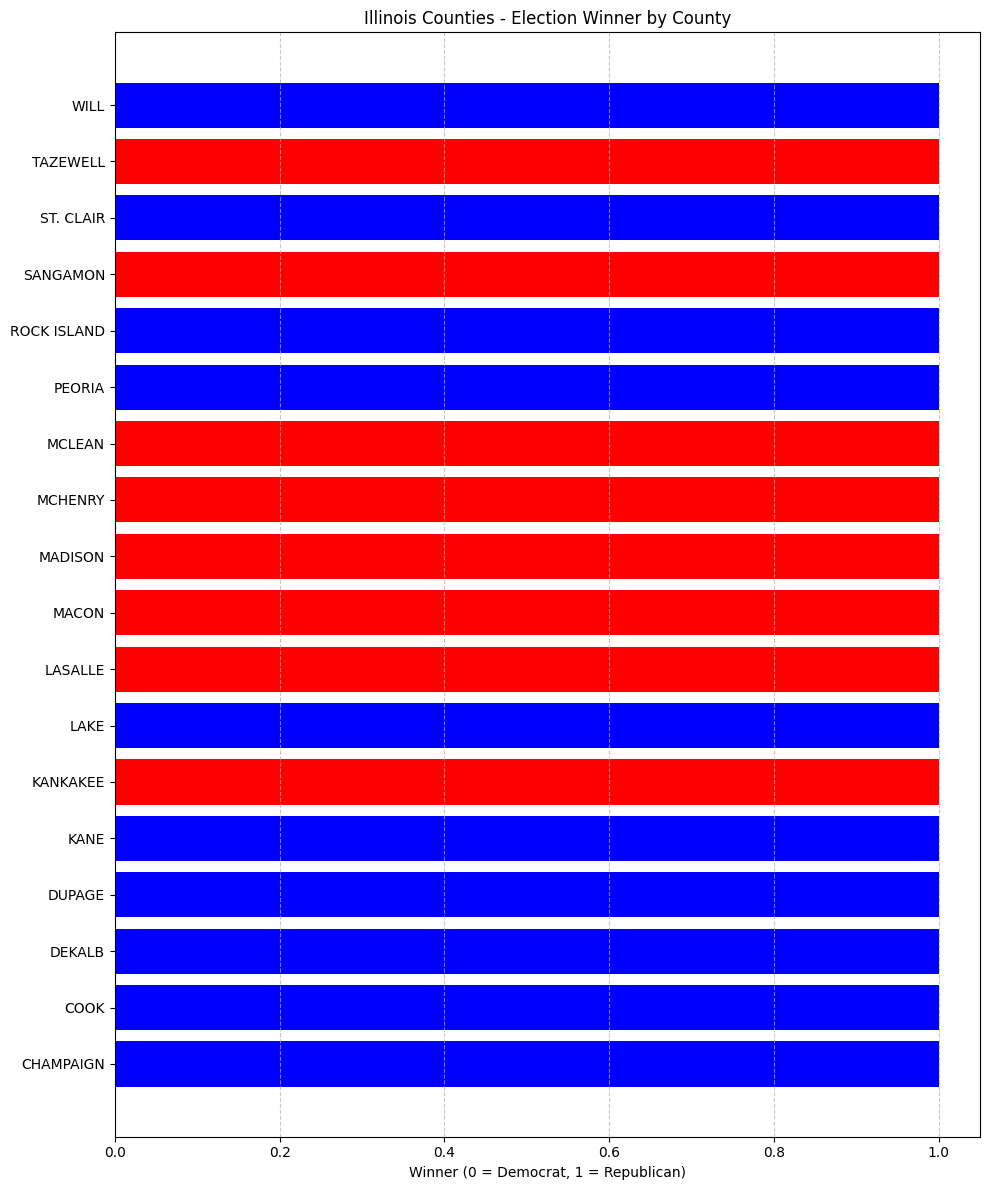

In [14]:

colors = il_grouped['winner'].apply(lambda x: 'blue' if x == 0 else 'red')
winner_adjusted = il_grouped['winner'].apply(lambda x: 1 if x == 0 else 1)
plt.figure(figsize=(10, 12))
plt.barh(il_grouped['county_name'], winner_adjusted, color=colors)
plt.xlabel('Winner (0 = Democrat, 1 = Republican)')
plt.title('Illinois Counties - Election Winner by County')
plt.yticks(rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


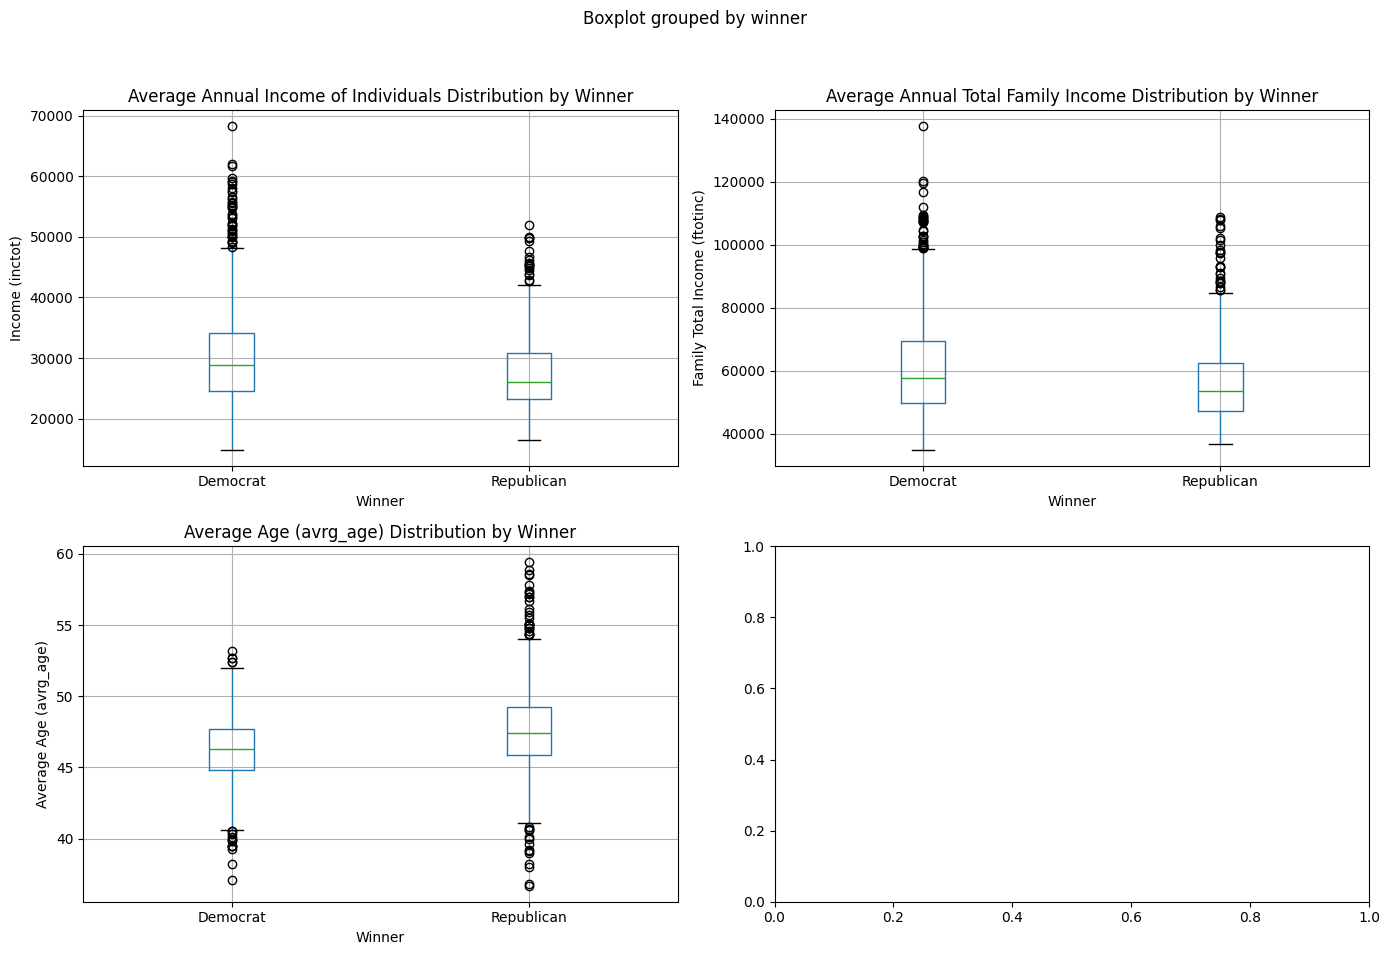

In [15]:

# Filter the data for relevant columns and remove NaN values in 'winner' and relevant columns
filtered_data = select_data[['winner', 'inctot', 'ftotinc', 'avrg_age']].dropna()

# Mapping winner values: 0.0 as 'Democrat' and 1.0 as 'Republican'
winner_map = {0.0: 'Democrat', 1.0: 'Republican'}
filtered_data['winner'] = filtered_data['winner'].map(winner_map)

# Plotting income and age distributions for each winner
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Income and Age Distribution by Winner')

# Income distribution for 'inctot' (Total Income) by Winner
filtered_data.boxplot(column='inctot', by='winner', ax=axs[0, 0])
axs[0, 0].set_title('Average Annual Income of Individuals Distribution by Winner')
axs[0, 0].set_xlabel('Winner')
axs[0, 0].set_ylabel('Income (inctot)')

# Income distribution for 'ftotinc' (Family Total Income) by Winner
filtered_data.boxplot(column='ftotinc', by='winner', ax=axs[0, 1])
axs[0, 1].set_title('Average Annual Total Family Income Distribution by Winner')
axs[0, 1].set_xlabel('Winner')
axs[0, 1].set_ylabel('Family Total Income (ftotinc)')

# Age distribution by Winner
filtered_data.boxplot(column='avrg_age', by='winner', ax=axs[1, 0])
axs[1, 0].set_title('Average Age (avrg_age) Distribution by Winner')
axs[1, 0].set_xlabel('Winner')
axs[1, 0].set_ylabel('Average Age (avrg_age)')

# Remove empty subplot space and improve layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


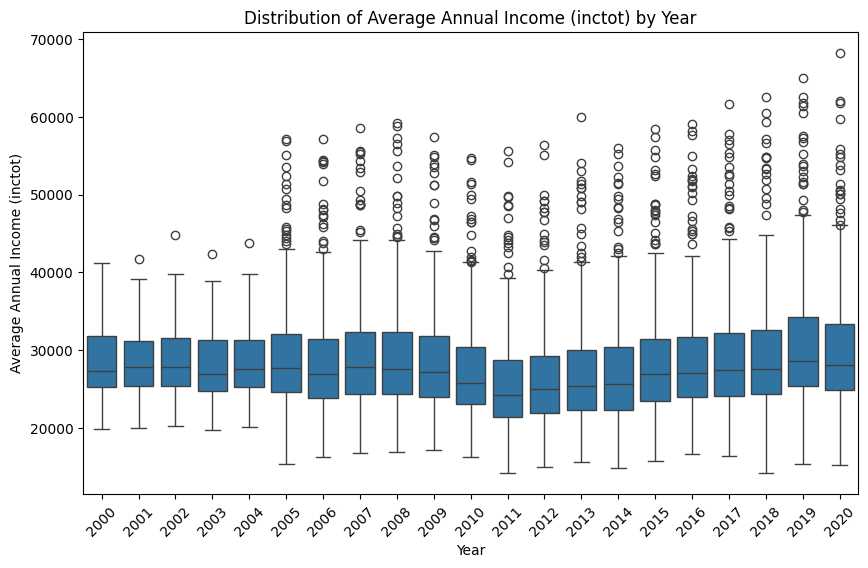

In [16]:
# Income Distribution by Year
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='year', y='inctot')
plt.title('Distribution of Average Annual Income (inctot) by Year')
plt.xlabel('Year')
plt.ylabel('Average Annual Income (inctot)')
plt.xticks(rotation=45)
plt.show()

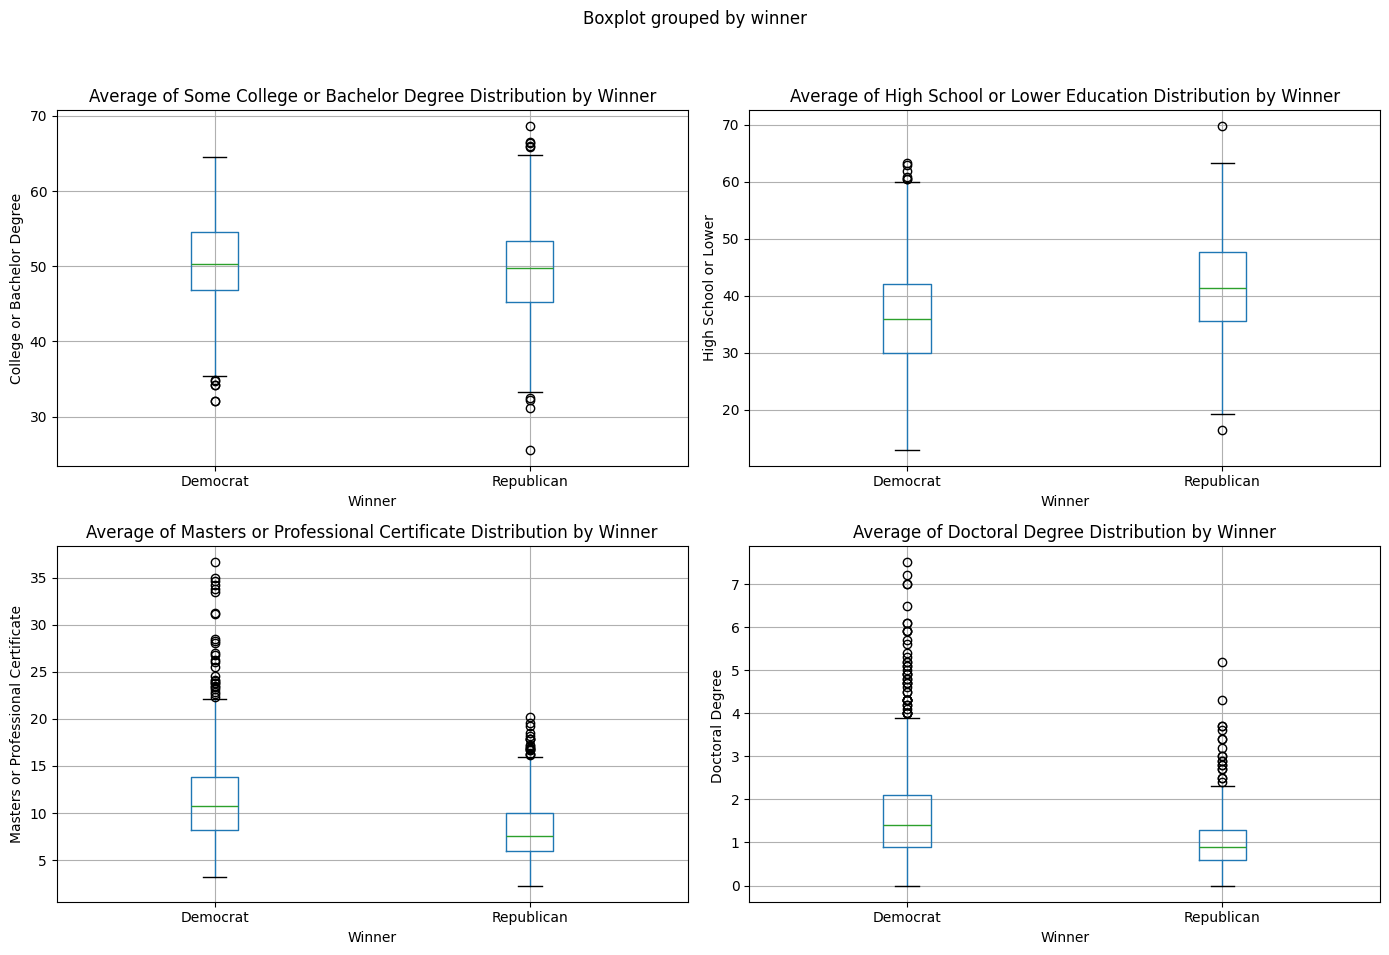

In [17]:

# Filter the data for relevant columns and remove NaN values in 'winner' and relevant columns
filtered_data2 = select_data[['winner', 'educ_attain_2.0_freq', 'educ_attain_1.0_freq', 'educ_attain_3.0_freq', 'educ_attain_4.0_freq']].dropna()

# Mapping winner values as requested: 0.0 as 'Democrat' and 1.0 as 'Republican'
winner_map = {0.0: 'Democrat', 1.0: 'Republican'}
filtered_data2['winner'] = filtered_data2['winner'].map(winner_map)

# Plotting income and age distributions for each winner
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Education Distribution by Winner')

filtered_data2.boxplot(column='educ_attain_2.0_freq', by='winner', ax=axs[0, 0])
axs[0, 0].set_title('Average of Some College or Bachelor Degree Distribution by Winner')
axs[0, 0].set_xlabel('Winner')
axs[0, 0].set_ylabel('College or Bachelor Degree')

filtered_data2.boxplot(column='educ_attain_1.0_freq', by='winner', ax=axs[0, 1])
axs[0, 1].set_title('Average of High School or Lower Education Distribution by Winner')
axs[0, 1].set_xlabel('Winner')
axs[0, 1].set_ylabel('High School or Lower')

filtered_data2.boxplot(column='educ_attain_3.0_freq', by='winner', ax=axs[1, 0])
axs[1, 0].set_title('Average of Masters or Professional Certificate Distribution by Winner')
axs[1, 0].set_xlabel('Winner')
axs[1, 0].set_ylabel('Masters or Professional Certificate')

filtered_data2.boxplot(column='educ_attain_4.0_freq', by='winner', ax=axs[1, 1])
axs[1, 1].set_title('Average of Doctoral Degree Distribution by Winner')
axs[1, 1].set_xlabel('Winner')
axs[1, 1].set_ylabel('Doctoral Degree ')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


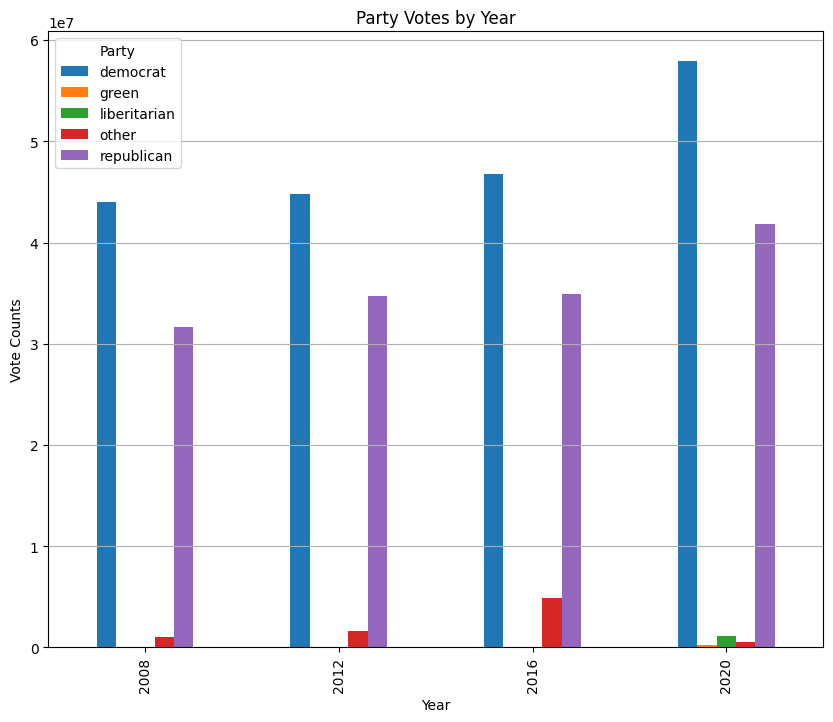

In [18]:
selected_columns = ['year', 'democrat', 'green', 'liberitarian', 'other', 'republican']

filtered_data = select_data[selected_columns]

grouped_data = filtered_data.groupby('year').sum()


# Plotting the data as a bar plot
grouped_data.plot(kind='bar', figsize=(10, 8))

# Plotting the distribution of voters by party affiliation
plt.title('Party Votes by Year')
plt.xlabel('Year')
plt.ylabel('Vote Counts')
plt.legend(title="Party")
plt.grid(axis='y')
plt.show()


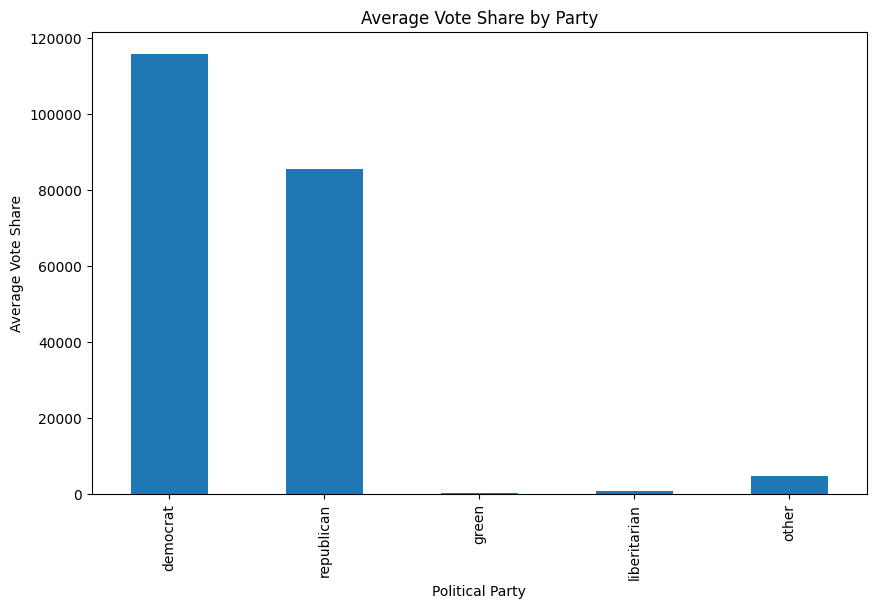

In [19]:
# Distribution of Votes by Party (democrat, republican, etc.)
plt.figure(figsize=(10, 6))
party_cols = ['democrat', 'republican', 'green', 'liberitarian', 'other']
data[party_cols].mean().plot(kind='bar')
plt.title('Average Vote Share by Party')
plt.xlabel('Political Party')
plt.ylabel('Average Vote Share')
plt.show()

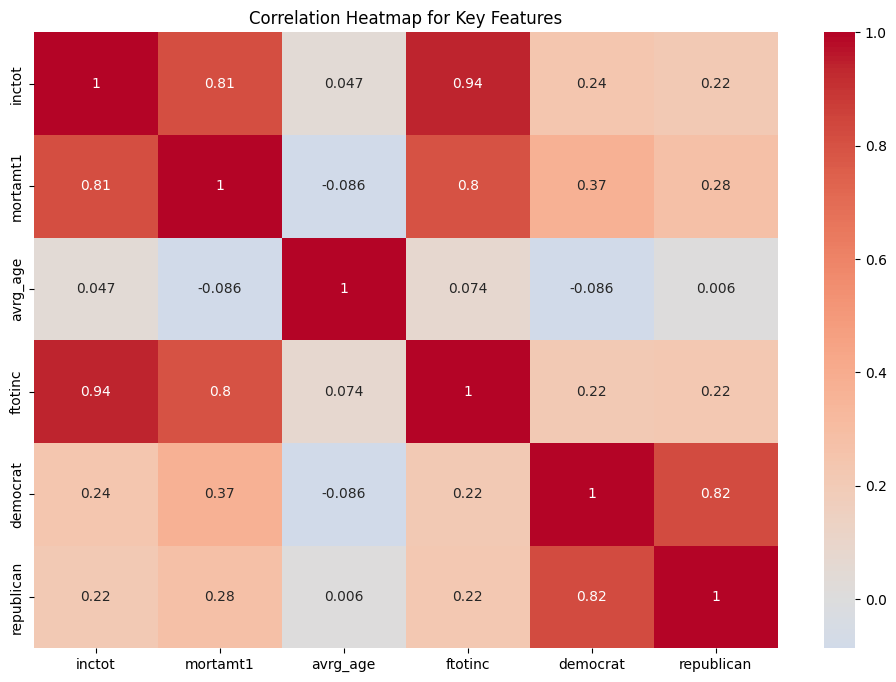

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = data[['inctot', 'mortamt1', 'avrg_age', 'ftotinc', 'democrat', 'republican']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Key Features')
plt.show()

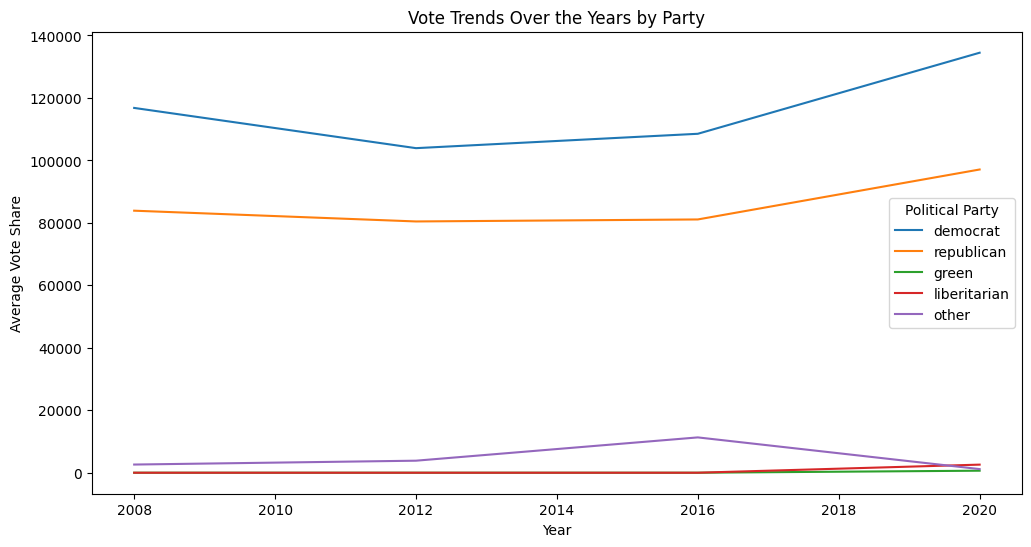

In [21]:
# Grouping by 'year' and summing the vote shares for main parties
vote_trends = select_data.groupby('year')[['democrat', 'republican', 'green', 'liberitarian', 'other']].mean()

# Plotting vote trends over the years for main parties
plt.figure(figsize=(12, 6))
for party in vote_trends.columns:
    plt.plot(vote_trends.index, vote_trends[party], label=party)

plt.title("Vote Trends Over the Years by Party")
plt.xlabel("Year")
plt.ylabel("Average Vote Share")
plt.legend(title="Political Party")
plt.show()

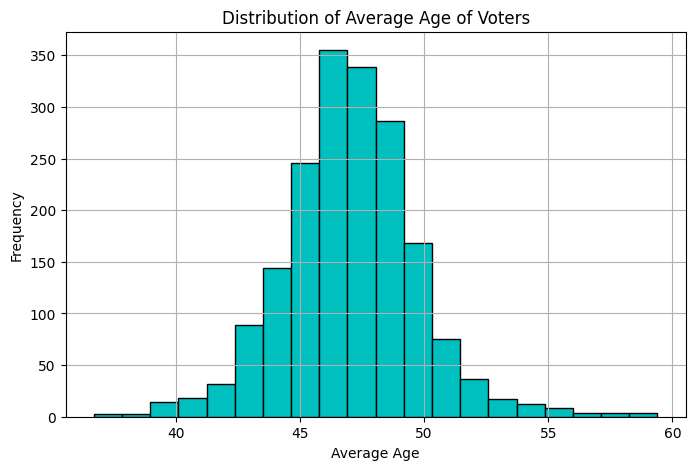

In [22]:
# Plotting age distribution

plt.figure(figsize=(8, 5))
plt.hist(select_data['avrg_age'], bins=20, color='c', edgecolor='k')

plt.title('Distribution of Average Age of Voters')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



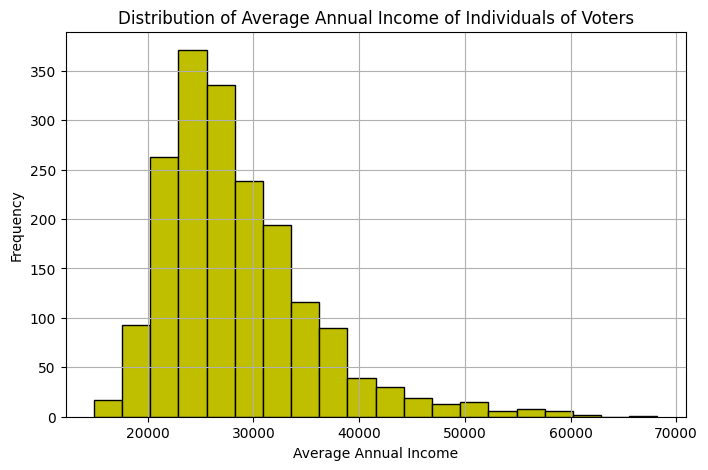

In [23]:
# Plotting Average Annual income distribution

plt.figure(figsize=(8, 5))
plt.hist(select_data['inctot'], bins=20, color='y', edgecolor='k')

plt.title('Distribution of Average Annual Income of Individuals of Voters')
plt.xlabel('Average Annual Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

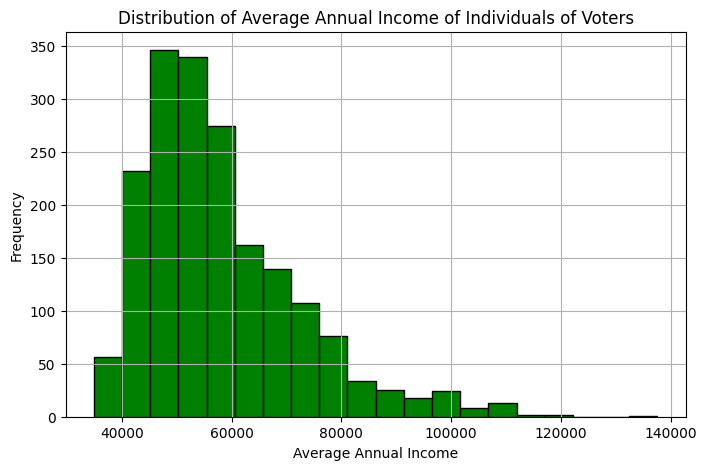

In [24]:
# Plotting Average Annual income of Individuals distribution

plt.figure(figsize=(8, 5))
plt.hist(select_data['ftotinc'], bins=20, color='g', edgecolor='k')

plt.title('Distribution of Average Annual Income of Individuals of Voters')
plt.xlabel('Average Annual Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

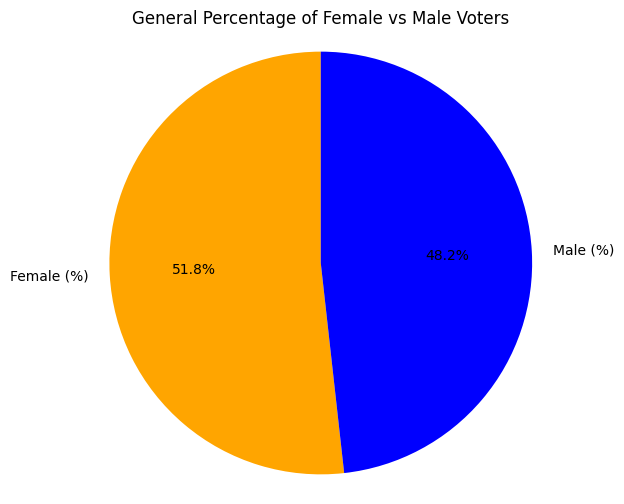

In [25]:
general_gender_percentages = select_data[['sex_2_freq', 'sex_1_freq']].mean()

# plotting the general gender percentages as a pie chart
labels = ['Female (%)', 'Male (%)']
sizes = [general_gender_percentages['sex_2_freq'], general_gender_percentages['sex_1_freq']]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
plt.title('General Percentage of Female vs Male Voters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


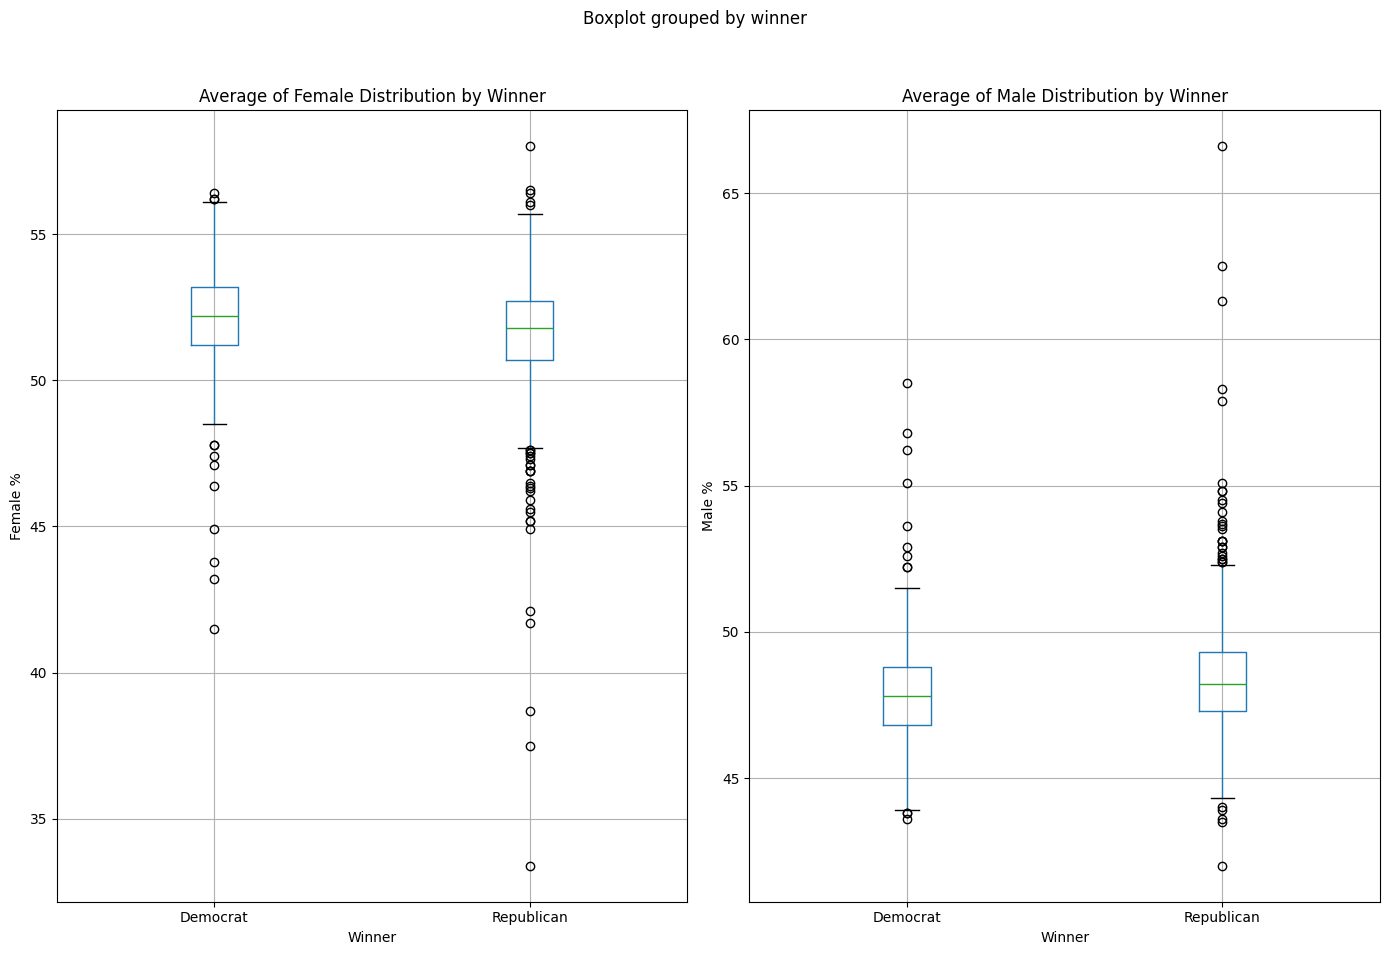

In [26]:

# Filter the data for relevant columns and remove NaN values in 'winner' and relevant columns
filtered_data3 = select_data[['winner', 'sex_2_freq', 'sex_1_freq']].dropna()

# Mapping winner values as requested: 0.0 as 'Democrat' and 1.0 as 'Republican'
winner_map = {0.0: 'Democrat', 1.0: 'Republican'}
filtered_data3['winner'] = filtered_data3['winner'].map(winner_map)

# Plotting income and age distributions for each winner
fig, axs = plt.subplots(1, 2, figsize=(14, 10))
fig.suptitle('Sex Distribution by Winner')

filtered_data3.boxplot(column='sex_2_freq', by='winner',  ax=axs[0])
axs[0].set_title('Average of Female Distribution by Winner')
axs[0].set_xlabel('Winner')
axs[0].set_ylabel('Female %')

filtered_data3.boxplot(column='sex_1_freq', by='winner', ax=axs[1])
axs[1].set_title('Average of Male Distribution by Winner')
axs[1].set_xlabel('Winner')
axs[1].set_ylabel('Male %')



plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


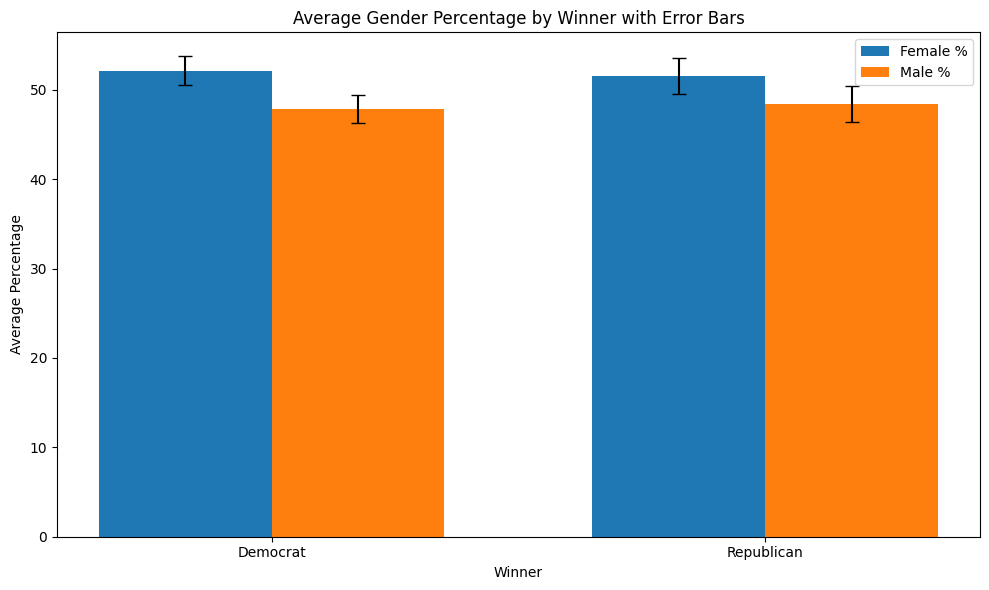

In [27]:

# Calculating the mean and standard deviation for each winner category for both sexes
gender_means = filtered_data3.groupby('winner')[['sex_2_freq', 'sex_1_freq']].mean()
gender_std = filtered_data3.groupby('winner')[['sex_2_freq', 'sex_1_freq']].std()

# Setting up bar plot with error bars
plt.figure(figsize=(10, 6))
x = np.arange(len(gender_means.index))  # positions for winner categories
width = 0.35  # bar width

# Plotting Female percentage with error bars
plt.bar(x - width/2, gender_means['sex_2_freq'], width, yerr=gender_std['sex_2_freq'], capsize=5, label='Female %')
# Plotting Male percentage with error bars
plt.bar(x + width/2, gender_means['sex_1_freq'], width, yerr=gender_std['sex_1_freq'], capsize=5, label='Male %')

# Labels and title
plt.xlabel('Winner')
plt.ylabel('Average Percentage')
plt.title('Average Gender Percentage by Winner with Error Bars')
plt.xticks(ticks=x, labels=gender_means.index)
plt.legend()

plt.tight_layout()
plt.show()


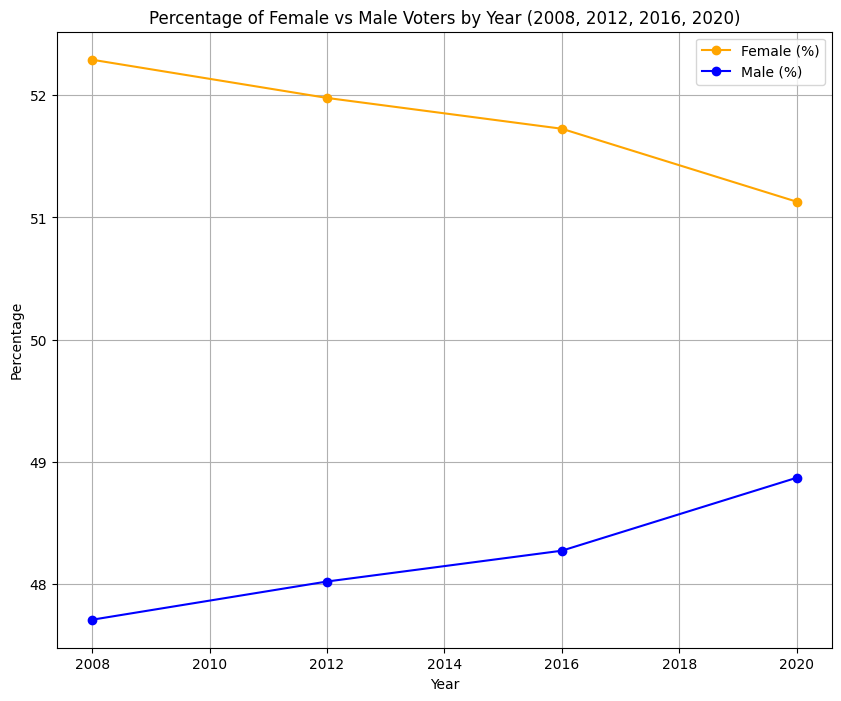

In [28]:
gender_data = select_data[['year', 'sex_2_freq','sex_1_freq']]

gender_by_year = gender_data.groupby('year').mean()

plt.figure(figsize=(10,8))

plt.plot(gender_by_year.index, gender_by_year['sex_2_freq'],marker='o', label = 'Female (%)', color = 'orange')
plt.plot(gender_by_year.index, gender_by_year['sex_1_freq'],marker='o', label = 'Male (%)', color = 'blue')

plt.title('Percentage of Female vs Male Voters by Year (2008, 2012, 2016, 2020)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()


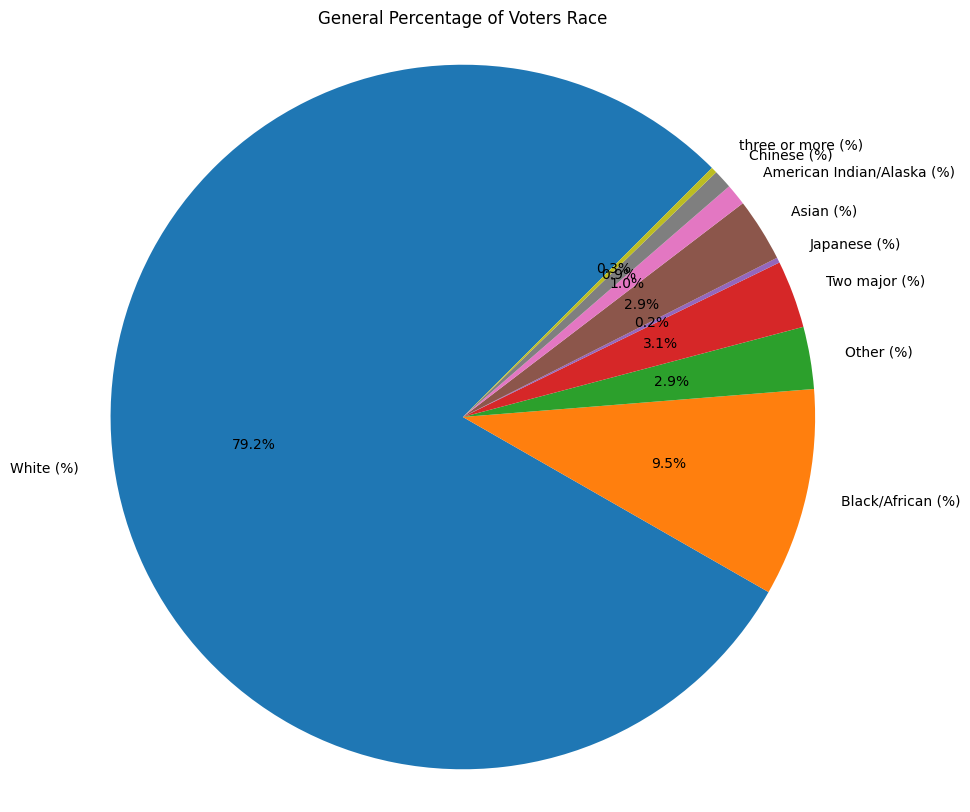

In [29]:
general_race_percentages = select_data[['race_1_freq', 'race_2_freq','race_7_freq','race_8_freq', 'race_5_freq','race_6_freq','race_3_freq','race_4_freq','race_9_freq']].mean()

# plotting the general gender percentages as a pie chart
labels = ['White (%)', 'Black/African (%)','Other (%)','Two major (%)','Japanese (%)','Asian (%)','American Indian/Alaska (%)','Chinese (%)','three or more (%)']
sizes = [general_race_percentages['race_1_freq'],general_race_percentages['race_2_freq'],general_race_percentages['race_7_freq'],general_race_percentages['race_8_freq'],general_race_percentages['race_5_freq'],general_race_percentages['race_6_freq'],general_race_percentages['race_3_freq'],general_race_percentages['race_4_freq'],general_race_percentages['race_9_freq']]

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
plt.title('General Percentage of Voters Race')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

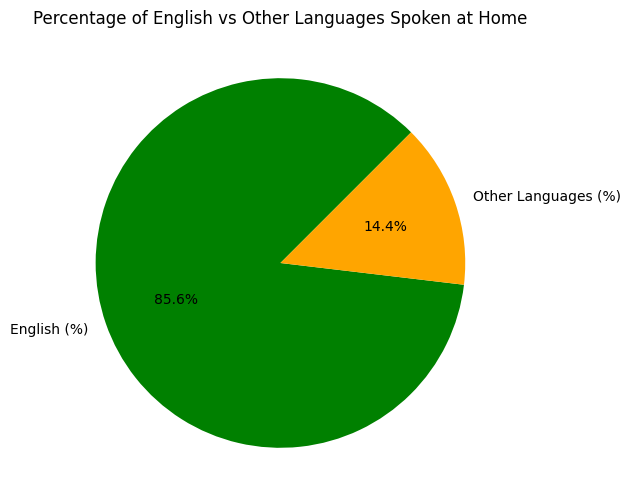

In [30]:
Language_percentages = select_data[['lang_1_freq', 'lang_2_freq']].mean()

# Plotting the general gender percentages as a pie chart
labels = ['English (%)', 'Other Languages (%)']
sizes = [Language_percentages['lang_1_freq'], Language_percentages['lang_2_freq']]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45, colors=['green', 'orange'])
plt.title('Percentage of English vs Other Languages Spoken at Home')
plt.show()

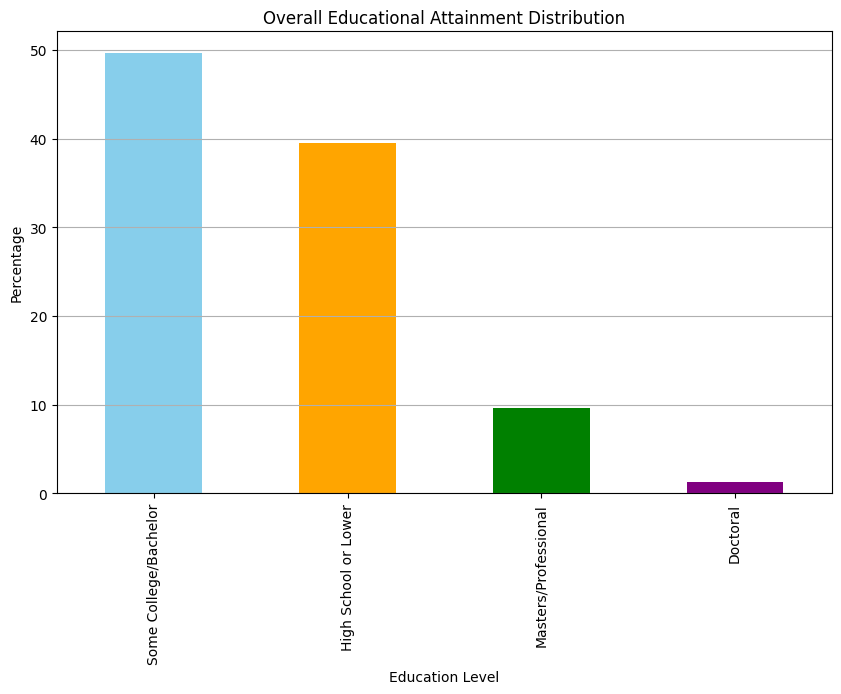

In [31]:
# Extracting the relevant education-related columns from the dataset
education_columns = ['educ_attain_2.0_freq', 'educ_attain_1.0_freq', 'educ_attain_3.0_freq', 'educ_attain_4.0_freq']

# Calculating the mean for each education category across all years
education_data = select_data[education_columns].mean()

# Plotting a bar chart for the overall education attainment percentages
plt.figure(figsize=(10, 6))
education_data.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'])

plt.title('Overall Educational Attainment Distribution')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(ticks=range(4), labels=['Some College/Bachelor', 'High School or Lower', 'Masters/Professional', 'Doctoral'])
plt.grid(axis='y')
plt.show()


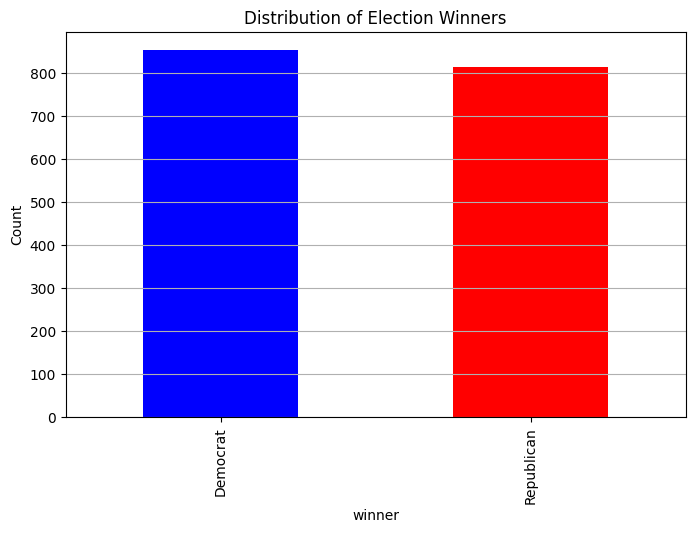

In [32]:
# Plotting a bar chart to see the distribution of winners (Democrat = 0, Republican = 1)
winner_distribution = select_data['winner'].value_counts()

plt.figure(figsize=(8, 5))
winner_distribution.plot(kind='bar', color=['blue', 'red'])

plt.title('Distribution of Election Winners')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Democrat', 'Republican'])
plt.grid(axis='y')
plt.show()


In [33]:
# Grouping the data by the 'winner' column and calculating the mean of 'educ_attain_2.0_freq' for each group
education_vs_winner1 = select_data.groupby('winner')['educ_attain_2.0_freq'].mean()

# Renaming the series to 'Some College/Bachelor'
education_vs_winner1.rename('Some College/Bachelor', inplace=True)
education_vs_winner1.index = education_vs_winner1.index.map({0.0: 'Democrat', 1.0: 'Republican'})


education_vs_winner1

,Some College/Bachelor
winner,
Democrat,50.443091
Republican,49.350490


# there is a very small difference in the education level between areas that voted for Democrats versus Republicans,

In [34]:
education_vs_winner2 = select_data.groupby('winner')['educ_attain_1.0_freq'].mean()
education_vs_winner2.rename('High School/Lower', inplace=True)
education_vs_winner2.index = education_vs_winner2.index.map({0.0: 'Democrat', 1.0: 'Republican'})
education_vs_winner2

,High School/Lower
winner,
Democrat,36.431030
Republican,41.447794


In [35]:
education_vs_winner3 = select_data.groupby('winner')['educ_attain_3.0_freq'].mean()
education_vs_winner3.rename('Master Degree', inplace=True)
education_vs_winner3.index = education_vs_winner3.index.map({0.0: 'Democrat', 1.0: 'Republican'})
education_vs_winner3

,Master Degree
winner,
Democrat,11.427518
Republican,8.221078


In [36]:
education_vs_winner4 = select_data.groupby('winner')['educ_attain_4.0_freq'].mean()
education_vs_winner4.rename('Doctoral Degree', inplace=True)
education_vs_winner4.index = education_vs_winner4.index.map({0.0: 'Democrat', 1.0: 'Republican'})
education_vs_winner4

,Doctoral Degree
winner,
Democrat,1.698478
Republican,0.981005


In [37]:
employed_vs_winner1 = select_data.groupby('winner')['empstat_1.0_freq'].mean()
employed_vs_winner1.rename('Employed', inplace=True)
employed_vs_winner1.index = employed_vs_winner1.index.map({0.0: 'Democrat', 1.0: 'Republican'})
employed_vs_winner1

,Employed
winner,
Democrat,59.248946
Republican,57.156127


In [38]:
employed_vs_winner2 = select_data.groupby('winner')['empstat_2.0_freq'].mean()
employed_vs_winner2.rename('Unemployed', inplace=True)
employed_vs_winner2.index = employed_vs_winner2.index.map({0.0: 'Democrat', 1.0: 'Republican'})
employed_vs_winner2

,Unemployed
winner,
Democrat,4.065574
Republican,3.410907


In [39]:
rename_data = select_data.rename(columns={
'year': 'year',
'county_fips': 'country FIP codes',
'inctot':'Average Annual Income of Individuals',
'mortamt1': 'Average Amount Of Mortgage Payments',
'avrg_age' : 'Average Age',
'ftotinc': 'Average Annual Total Family Income',
'foodstmp_1_freq': '% Not Receive Foodstamps',
'foodstmp_2_freq ': '% Received Foodstamps',
'sex_2_freq': '% of Females',
'sex_1_freq': '% of Males',
'marst_5_freq' : '% of Widowed',
'marst_6_freq': '% of Never Married',
'marst_1_freq': '% of Married Spouse Present',
'marst_4_freq':'% of Divorced',
'marst_3_freq' :'% of Seperated',
'marst_2_freq':'% of Married Spouse Absent',
'race_1_freq':'% of White',
'race_2_freq':'% of Black/African American',
'race_7_freq':'% of Other Race',
'race_8_freq':'% of Two major Races',
'race_5_freq':'% of Japanese',
'race_6_freq':'% of Asian',
'race_3_freq':'% of American Indian or Alaska Native',
'race_4_freq':'% of Chinese',
'race_9_freq':'% of Three or More Races',
'ctz_stat_1_freq':'% of US Citizen',
'ctz_stat_3_freq':'% of Non US Citizen',
'ctz_stat_2_freq':'% of Naturalized Citizen',
'lang_1_freq':'% of English Is Spoken',
'lang_2_freq':'% of Another Language Is Spoken',
'educ_attain_2.0_freq': '% of Some College or Bachelor Degree',
'educ_attain_1.0_freq':'% of High School or Lower Education',
'educ_attain_3.0_freq':'% of Masters or Professional Certificate',
'educ_attain_4.0_freq':'% of Doctoral Degree',
'empstat_1.0_freq':'% of Employed',
'empstat_3.0_freq':'% of Not In The Labor Force',
'empstat_2.0_freq':'% of Unemployed',
'state_po':'State Abbreviations',
'county_name' :'County Name',
'democrat':'# of Votes For Democrats',
'green':'# of Votes For Green',
'liberitarian':'# of Votes For Liberitarian',
'other':'# of Votes For Other Parties',
'republican':'# of Votes For Republican Party',
'winner':'winner'})
rename_data

,year,country FIP codes,Average Annual Income of Individuals,Average Amount Of Mortgage Payments,Average Age,Average Annual Total Family Income,% Not Receive Foodstamps,foodstmp_2_freq,% of Females,% of Males,...,% of Not In The Labor Force,% of Unemployed,State Abbreviations,County Name,# of Votes For Democrats,# of Votes For Green,# of Votes For Liberitarian,# of Votes For Other Parties,# of Votes For Republican Party,winner
0,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,41.6,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,43.5,2.4,AL,BALDWIN,19386.0,0.0,0.0,756.0,61271.0,1.0
2,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,41.1,4.5,AL,CALHOUN,16334.0,0.0,0.0,560.0,32348.0,1.0
3,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,46.8,2.9,AL,ETOWAH,13497.0,0.0,0.0,645.0,30595.0,1.0
4,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,38.1,3.4,AL,JEFFERSON,166121.0,0.0,0.0,2482.0,149921.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,42.3,1.4,WI,SHEBOYGAN,27101.0,2.0,896.0,403.0,37609.0,1.0
1854,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,37.6,0.8,WI,WALWORTH,22789.0,15.0,641.0,304.0,33851.0,1.0
1855,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,37.3,2.0,WI,WAUKESHA,103906.0,54.0,3023.0,1364.0,159649.0,1.0
1856,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,41.5,1.6,WI,WINNEBAGO,44060.0,38.0,1629.0,509.0,47796.0,1.0


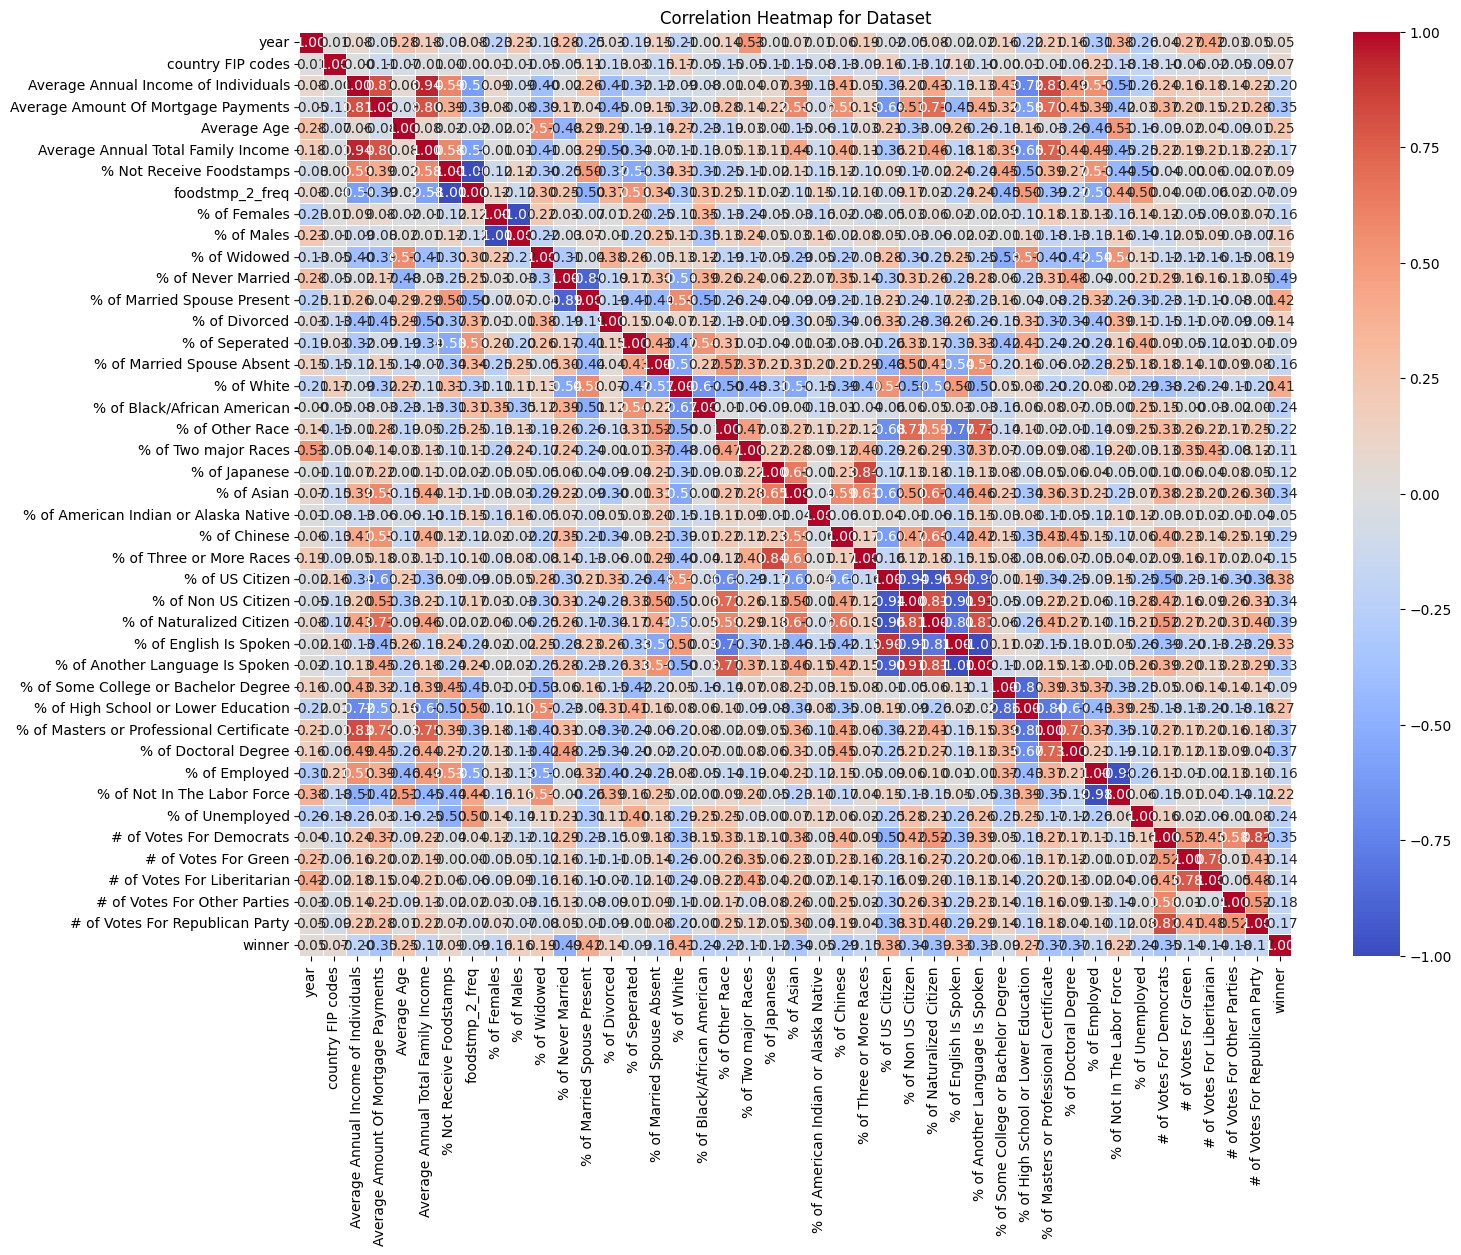

In [40]:
numeric_data = rename_data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Dataset')
plt.show()

In [41]:
rename_data = rename_data.drop(columns = ['% Not Receive Foodstamps','foodstmp_2_freq','% of Married Spouse Absent','% of Three or More Races',
                                          '% of US Citizen','% of Doctoral Degree'])

In [42]:
Train_data = rename_data.loc[rename_data['year'].isin([2008,2012,2016])]
Train_data = Train_data.drop(columns=['year'])
Train_data = Train_data.reset_index(drop=True)

validation_data = rename_data[rename_data['year'] == 2020]
validation_data = validation_data.drop(columns=['year'])
validation_data = validation_data.reset_index(drop=True)


In [43]:
Train_data.shape

(1380, 38)

In [44]:
validation_data.shape

(478, 38)

In [45]:
Train_data= Train_data.drop(columns=[
       '# of Votes For Green', '# of Votes For Liberitarian',
       '# of Votes For Other Parties', 'winner'])


validation_data = validation_data.drop(columns=[
       '# of Votes For Green', '# of Votes For Liberitarian',
       '# of Votes For Other Parties', 'winner'])

In [46]:
Train_data = Train_data.dropna(subset=['State Abbreviations', 'County Name'])
validation_data = validation_data.dropna(subset=['State Abbreviations', 'County Name'])

In [47]:
target_cols = ['# of Votes For Democrats','# of Votes For Republican Party']
X_train = Train_data.select_dtypes(include=['number']).drop(columns=target_cols)
y_train = Train_data[target_cols]

X_val = validation_data.select_dtypes(include=['number']).drop(columns=target_cols)
y_val = validation_data[target_cols]



In [48]:
y_train.isna().sum()

,0
# of Votes For Democrats,0
# of Votes For Republican Party,0


In [49]:
base_model = LinearRegression()
multi_target_model = MultiOutputRegressor(base_model)

multi_target_model.fit(X_train, y_train)

# Predict on validation set
y_pred_linear = multi_target_model.predict(X_val)

# Evaluating the Logistic Regression model
mae_linear = mean_absolute_error(y_val, y_pred_linear, multioutput='raw_values')
r2_linear = r2_score(y_val, y_pred_linear, multioutput='raw_values')


In [50]:
mae_linear

array([113811.16804552,  88581.18057787])

In [51]:
r2_linear

array([ 0.04613642, -0.70406693])

In [52]:

# Initialize and train a simple Random Forest Classifier
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred = rf_model.predict(X_val)

# Evaluating the model
mae_rf = mean_absolute_error(y_val, y_pred,  multioutput='raw_values')
r2_rf = r2_score(y_val, y_pred,  multioutput='raw_values')
print(mae_rf)
print(r2_rf)

[69060.07979118 43356.20647332]
[0.62408672 0.53352367]


In [53]:
# Initialize and train an XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_val)

# Evaluating the model
mae_xgb = mean_absolute_error(y_val, y_pred, multioutput='raw_values')
r2_xgb = r2_score(y_val, y_pred, multioutput='raw_values')

print("Mean Absolute Error (XGBoost):", mae_xgb)
print("R2 Score (XGBoost):", r2_xgb)


Mean Absolute Error (XGBoost): [59211.62680926 43199.6941728 ]
R2 Score (XGBoost): [0.7345737 0.4971732]


In [54]:

# Dictionary mapping state abbreviations to their electoral votes for the 2020 election
electoral_votes_2020 = {
    'AL': 9, 'AK': 3, 'AZ': 11, 'AR': 6, 'CA': 55, 'CO': 9, 'CT': 7,
    'DE': 3, 'FL': 29, 'GA': 16, 'HI': 4, 'ID': 4, 'IL': 20, 'IN': 11,
    'IA': 6, 'KS': 6, 'KY': 8, 'LA': 8, 'ME': 4, 'MD': 10, 'MA': 11,
    'MI': 16, 'MN': 10, 'MS': 6, 'MO': 10, 'MT': 3, 'NE': 5, 'NV': 6,
    'NH': 4, 'NJ': 14, 'NM': 5, 'NY': 29, 'NC': 15, 'ND': 3, 'OH': 18,
    'OK': 7, 'OR': 7, 'PA': 20, 'RI': 4, 'SC': 9, 'SD': 3, 'TN': 11,
    'TX': 38, 'UT': 6, 'VT': 3, 'VA': 13, 'WA': 12, 'WV': 5, 'WI': 10,
    'WY': 3, 'DC': 3
}

def predict_and_determine_winner(y_pred, validation_data, electoral_votes):
    # Convert predictions to a DataFrame with appropriate columns
    y_pred_df = pd.DataFrame(y_pred, columns=['# of Votes For Democrats', '# of Votes For Republican Party'])
    y_pred_df['State'] = validation_data['State Abbreviations'].values
    y_pred_df['County Name'] = validation_data['County Name'].values

    # Aggregate votes by state
    state_results = y_pred_df.groupby('State')[['# of Votes For Democrats', '# of Votes For Republican Party']].sum()
    state_results['State Winner'] = state_results.apply(
        lambda row: 'Democrat' if row['# of Votes For Democrats'] > row['# of Votes For Republican Party'] else 'Republican',
        axis=1
    )

    # Map state wins to electoral votes
    democrat_votes = 0
    republican_votes = 0
    for state, winner in state_results['State Winner'].items():
        print(state,': ',winner)
        if winner == 'Democrat':
            democrat_votes += electoral_votes.get(state, 0)
        else:
            republican_votes += electoral_votes.get(state, 0)

    # Determine overall winner
    national_winner = 'Democrat' if democrat_votes > republican_votes else 'Republican'

    print("Electoral Votes for Democrats:", democrat_votes)
    print("Electoral Votes for Republicans:", republican_votes)
    print("Predicted National Winner:", national_winner)

    return state_results, national_winner

# Using the function with y_pred and validation data
state_results, national_winner = predict_and_determine_winner(y_pred, validation_data, electoral_votes_2020)



AK :  Republican
AL :  Republican
AR :  Republican
AZ :  Democrat
CA :  Democrat
CO :  Democrat
CT :  Democrat
DC :  Democrat
DE :  Democrat
FL :  Democrat
GA :  Democrat
HI :  Democrat
IA :  Republican
ID :  Republican
IL :  Democrat
IN :  Republican
KS :  Democrat
KY :  Democrat
LA :  Democrat
MA :  Democrat
MD :  Democrat
ME :  Republican
MI :  Democrat
MN :  Democrat
MO :  Democrat
MS :  Democrat
NC :  Democrat
ND :  Republican
NE :  Democrat
NJ :  Democrat
NM :  Republican
NV :  Democrat
NY :  Democrat
OH :  Republican
OK :  Republican
OR :  Democrat
PA :  Democrat
RI :  Democrat
SC :  Republican
TN :  Republican
TX :  Democrat
UT :  Republican
VA :  Democrat
WA :  Democrat
WI :  Democrat
Electoral Votes for Democrats: 415
Electoral Votes for Republicans: 102
Predicted National Winner: Democrat


In [55]:


def calculate_actual_electoral_votes(y_val, validation_data, electoral_votes):
    # Combine actual votes with validation data to get state information
    actual_votes_df = pd.DataFrame(y_val, columns=['# of Votes For Democrats', '# of Votes For Republican Party'])
    actual_votes_df['State'] = validation_data['State Abbreviations'].values
    actual_votes_df['County Name'] = validation_data['County Name'].values

    # Aggregate actual votes by state
    state_results_actual = actual_votes_df.groupby('State')[['# of Votes For Democrats', '# of Votes For Republican Party']].sum()
    state_results_actual['State Winner'] = state_results_actual.apply(
        lambda row: 'Democrat' if row['# of Votes For Democrats'] > row['# of Votes For Republican Party'] else 'Republican',
        axis=1
    )

    # Map state wins to electoral votes
    democrat_votes = 0
    republican_votes = 0
    for state, winner in state_results_actual['State Winner'].items():
        if winner == 'Democrat':
            democrat_votes += electoral_votes.get(state, 0)
        else:
            republican_votes += electoral_votes.get(state, 0)

    # Determine the overall winner
    national_winner = 'Democrat' if democrat_votes > republican_votes else 'Republican'

    print("Actual Electoral Votes for Democrats:", democrat_votes)
    print("Actual Electoral Votes for Republicans:", republican_votes)
    print("Actual National Winner:", national_winner)

    return state_results_actual, national_winner

# Using the function with y_val and validation data
state_results_actual, national_winner = calculate_actual_electoral_votes(y_val, validation_data, electoral_votes_2020)



Actual Electoral Votes for Democrats: 434
Actual Electoral Votes for Republicans: 83
Actual National Winner: Democrat


# New Dataset

In [56]:
df2023 = pd.read_csv('Race and Age.csv')
df2023.shape

(2562, 12)

In [57]:
df2023.head(10)

,Label (Grouping),SEX AND AGE!!Total population!!Male,SEX AND AGE!!Total population!!Female,SEX AND AGE!!Total population!!Median age (years),RACE!!Total population!!One race!!White,RACE!!Total population!!One race!!Black or African American,RACE!!Total population!!One race!!American Indian and Alaska Native,RACE!!Total population!!One race!!Asian,RACE!!Total population!!One race!!Asian!!Chinese,RACE!!Total population!!One race!!Asian!!Japanese,RACE!!Total population!!One race!!Some Other Race,RACE!!Total population!!Two or More Races
0,"-> Baldwin County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estimate,"124,518","128,989",44.3,"208,150","20,974",952,"3,074",N,N,"5,559","14,403"
2,Percent,49.1%,50.9%,(X),82.1%,8.3%,0.4%,1.2%,N,N,2.2%,5.7%
3,"-> Calhoun County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Estimate,"56,185","60,244",40.5,"83,530","25,351",342,"1,236",N,N,"1,428","4,542"
5,Percent,48.3%,51.7%,(X),71.7%,21.8%,0.3%,1.1%,N,N,1.2%,3.9%
6,"-> Cullman County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Estimate,"45,015","47,001",40.1,"82,279","1,022",64,519,N,N,"1,557","6,575"
8,Percent,48.9%,51.1%,(X),89.4%,1.1%,0.1%,0.6%,N,N,1.7%,7.1%
9,"-> DeKalb County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:

# Iterate over the rows to find "Estimate" entries and replace them with the county/state name above
for i in range(1, len(df2023)):
    # Check if the row contains "Estimate"
    if df2023.iloc[i, 0].strip() == "Estimate":
        # Replace "Estimate" with the county/state name from two rows above
        df2023.at[i, 'Label (Grouping)'] = df2023.iloc[i - 1, 0]


In [59]:
# Remove rows where all values (except the label column) are NaN
df2023 = df2023.dropna(how='all', subset=df2023.columns[1:])

# Display the first few rows of the cleaned DataFrame
df2023.head(20)


,Label (Grouping),SEX AND AGE!!Total population!!Male,SEX AND AGE!!Total population!!Female,SEX AND AGE!!Total population!!Median age (years),RACE!!Total population!!One race!!White,RACE!!Total population!!One race!!Black or African American,RACE!!Total population!!One race!!American Indian and Alaska Native,RACE!!Total population!!One race!!Asian,RACE!!Total population!!One race!!Asian!!Chinese,RACE!!Total population!!One race!!Asian!!Japanese,RACE!!Total population!!One race!!Some Other Race,RACE!!Total population!!Two or More Races
1,"-> Baldwin County, Alabama","124,518","128,989",44.3,"208,150","20,974",952,"3,074",N,N,"5,559","14,403"
2,Percent,49.1%,50.9%,(X),82.1%,8.3%,0.4%,1.2%,N,N,2.2%,5.7%
4,"-> Calhoun County, Alabama","56,185","60,244",40.5,"83,530","25,351",342,"1,236",N,N,"1,428","4,542"
5,Percent,48.3%,51.7%,(X),71.7%,21.8%,0.3%,1.1%,N,N,1.2%,3.9%
7,"-> Cullman County, Alabama","45,015","47,001",40.1,"82,279","1,022",64,519,N,N,"1,557","6,575"
8,Percent,48.9%,51.1%,(X),89.4%,1.1%,0.1%,0.6%,N,N,1.7%,7.1%
10,"-> DeKalb County, Alabama","36,341","36,228",39.9,"58,067",634,275,332,N,N,"9,339","3,911"
11,Percent,50.1%,49.9%,(X),80.0%,0.9%,0.4%,0.5%,N,N,12.9%,5.4%
13,"-> Elmore County, Alabama","44,607","45,834",40.2,"65,381","18,189",297,69,N,N,"1,479","5,018"
14,Percent,49.3%,50.7%,(X),72.3%,20.1%,0.3%,0.1%,N,N,1.6%,5.5%


In [60]:
#Remove Percent rows
df2023 = df2023[~df2023['Label (Grouping)'].str.contains("Percent", na=False)]

In [61]:
#Remove symbol -> before county's name
df2023['Label (Grouping)'] = df2023['Label (Grouping)'].str.replace("->", "", regex=False).str.strip()

<ipython-input-61-28b9007b5376>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['Label (Grouping)'] = df2023['Label (Grouping)'].str.replace("->", "", regex=False).str.strip()


In [62]:
# Reset the index of the cleaned DataFrame and drop the old index
df2023.reset_index(drop=True, inplace=True)

In [63]:

df2023['state'] = df2023['Label (Grouping)'].apply(lambda x: x.split(',')[-1].strip())


<ipython-input-63-03d887ab7839>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['state'] = df2023['Label (Grouping)'].apply(lambda x: x.split(',')[-1].strip())


In [64]:
df2023['Label (Grouping)'] = df2023['Label (Grouping)'].apply(lambda x: x.split(',')[0].strip())

<ipython-input-64-d9995065dc6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['Label (Grouping)'] = df2023['Label (Grouping)'].apply(lambda x: x.split(',')[0].strip())


In [65]:
df2023 = df2023[df2023['state'] != "Puerto Rico"]

In [66]:
df2023_inc = pd.read_csv('income and educ.csv')
df2023_inc.shape

(438, 20)

In [67]:
# Iterate over the rows to find "Estimate" entries and replace them with the county/state name above
for i in range(1, len(df2023_inc)):
    # Check if the row contains "Estimate"
    if df2023_inc.iloc[i, 0].strip() == "Estimate":
        # Replace "Estimate" with the county/state name from two rows above
        df2023_inc.at[i, 'Label (Grouping)'] = df2023_inc.iloc[i - 2, 0]

In [68]:
# Remove rows where all values (except the label column) are NaN
df2023_inc = df2023_inc.dropna(how='all', subset=df2023_inc.columns[1:])

# Display the first few rows of the cleaned DataFrame
df2023_inc.head(20)

,Label (Grouping),"MARITAL STATUS!!Population 15 years and over!!Now married, except separated",MARITAL STATUS!!Population 15 years and over!!Widowed,MARITAL STATUS!!Population 15 years and over!!Divorced,MARITAL STATUS!!Population 15 years and over!!Separated,MARITAL STATUS!!Population 15 years and over!!Never married,EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,"PLACE OF BIRTH, CITIZENSHIP STATUS AND YEAR OF ENTRY!!Foreign-born!!Foreign-born; naturalized U.S. citizen","PLACE OF BIRTH, CITIZENSHIP STATUS AND YEAR OF ENTRY!!Foreign-born!!Foreign-born; not a U.S. citizen",LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH!!Population 5 years and over!!English only,LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH!!Population 5 years and over!!Language other than English,EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,INCOME IN THE PAST 12 MONTHS (IN 2023 INFLATION-ADJUSTED DOLLARS)!!Families!!Median family income (dollars),INCOME IN THE PAST 12 MONTHS (IN 2023 INFLATION-ADJUSTED DOLLARS)!!Families!!Median income (dollars),OWNER CHARACTERISTICS!!Owner-occupied housing units!!Median selected monthly owner costs with a mortgage (dollars)
2,"Jefferson County, Alabama",43.2%,5.8%,11.7%,1.7%,37.7%,24.9%,21.4%,15.3%,"10,170","20,011",92.3%,7.7%,61.3%,59.1%,2.1%,38.7%,"86,005","114,499","1,558"
5,"Maricopa County, Arizona",47.4%,4.9%,10.9%,1.3%,35.6%,22.0%,22.6%,14.4%,"314,332","361,580",73.9%,26.1%,65.2%,62.7%,2.4%,34.8%,"103,369","120,840","1,873"
8,"Pima County, Arizona",44.9%,5.6%,12.4%,1.3%,35.7%,21.3%,20.8%,15.9%,"72,002","58,004",73.2%,26.8%,59.4%,55.7%,2.7%,40.6%,"88,967","106,206","1,603"
11,"Alameda County, California",49.6%,4.1%,7.7%,1.5%,37.1%,15.8%,27.9%,24.0%,"319,945","258,366",51.7%,48.3%,67.1%,63.3%,3.5%,32.9%,"151,866","179,858","3,673"
14,"Contra Costa County, California",52.4%,4.6%,9.5%,1.5%,32.0%,17.3%,28.3%,17.9%,"187,915","137,610",61.2%,38.8%,65.3%,61.7%,3.6%,34.7%,"144,145","166,898","3,303"
17,"Fresno County, California",43.2%,4.4%,8.5%,2.7%,41.2%,23.7%,15.7%,9.1%,"99,305","101,613",57.0%,43.0%,61.4%,56.8%,4.5%,38.6%,"81,914","101,647","1,987"
20,"Kern County, California",42.7%,4.8%,9.2%,2.7%,40.7%,27.1%,12.1%,5.9%,"73,111","104,912",54.5%,45.5%,60.6%,55.2%,5.1%,39.4%,"75,635","95,011","1,896"
23,"Los Angeles County, California",42.1%,4.7%,8.0%,2.1%,43.0%,20.1%,23.1%,13.4%,"1,787,064","1,453,097",44.9%,55.1%,65.2%,61.3%,3.8%,34.8%,"98,689","122,287","3,036"
26,"Orange County, California",50.2%,4.4%,8.5%,1.4%,35.5%,17.2%,28.1%,16.4%,"573,578","393,745",53.1%,46.9%,65.9%,63.0%,2.7%,34.1%,"126,455","145,452","3,246"
29,"Riverside County, California",47.8%,5.0%,8.7%,1.8%,36.6%,26.9%,16.9%,9.6%,"312,591","237,927",55.7%,44.3%,61.9%,58.5%,3.1%,38.1%,"100,392","116,172","2,486"


In [69]:
df2023_inc['state'] = df2023_inc['Label (Grouping)'].apply(lambda x: x.split(',')[-1].strip())

df2023_inc['Label (Grouping)'] = df2023_inc['Label (Grouping)'].apply(lambda x: x.split(',')[0].strip())

df2023_inc = df2023_inc[df2023_inc['state'] != "Puerto Rico"]

# Remove '%' symbol and convert columns to numeric where applicable
df2023_inc = df2023_inc.applymap(lambda x: str(x).replace('%', '') if isinstance(x, str) else x)

df2023_inc.reset_index(drop=True, inplace=True)

<ipython-input-69-c804515b4b9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023_inc['state'] = df2023_inc['Label (Grouping)'].apply(lambda x: x.split(',')[-1].strip())
<ipython-input-69-c804515b4b9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023_inc['Label (Grouping)'] = df2023_inc['Label (Grouping)'].apply(lambda x: x.split(',')[0].strip())
<ipython-input-69-c804515b4b9a>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2023_inc = df2023_inc.applyma

In [70]:
print(df2023.shape)
print(df2023_inc.shape)

(843, 13)
(146, 21)


In [71]:
merged_df = pd.merge(df2023, df2023_inc, on=['Label (Grouping)', 'state'], how='inner')
print(merged_df.shape)

(146, 32)


In [72]:
rename_merge_df = merged_df.rename(columns={
       'Label (Grouping)':'County Name',
       'SEX AND AGE!!Total population!!Male':'% of Males',
       'SEX AND AGE!!Total population!!Female':'% of Females',
       'SEX AND AGE!!Total population!!Median age (years)':'Average Age',
       'RACE!!Total population!!One race!!White':'% of White',
       'RACE!!Total population!!One race!!Black or African American':'% of Black/African American',
       'RACE!!Total population!!One race!!American Indian and Alaska Native':'% of American Indian or Alaska Native',
       'RACE!!Total population!!One race!!Asian':'% of Asian',
       'RACE!!Total population!!One race!!Asian!!Chinese':'% of Chinese',
       'RACE!!Total population!!One race!!Asian!!Japanese':'% of Japanese',
       'RACE!!Total population!!One race!!Some Other Race':'% of Other Race',
       'RACE!!Total population!!Two or More Races':'% of Two major Races',
       'state':'State Abbreviations',
       'MARITAL STATUS!!Population 15 years and over!!Now married, except separated':'% of Married Spouse Present',
       'MARITAL STATUS!!Population 15 years and over!!Widowed':'% of Widowed',
       'MARITAL STATUS!!Population 15 years and over!!Divorced':'% of Divorced',
       'MARITAL STATUS!!Population 15 years and over!!Separated':'% of Seperated',
       'MARITAL STATUS!!Population 15 years and over!!Never married':'% of Never Married',
       'EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)':'% of High School or Lower Education',
       'EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor\'s degree':'% of Some College or Bachelor Degree',
       'EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree':'% of Masters or Professional Certificate',
       'PLACE OF BIRTH, CITIZENSHIP STATUS AND YEAR OF ENTRY!!Foreign-born!!Foreign-born; naturalized U.S. citizen':'% of Naturalized Citizen',
       'PLACE OF BIRTH, CITIZENSHIP STATUS AND YEAR OF ENTRY!!Foreign-born!!Foreign-born; not a U.S. citizen':'% of Non US Citizen',
       'LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH!!Population 5 years and over!!English only':'% of English Is Spoken',
       'LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH!!Population 5 years and over!!Language other than English':'% of Another Language Is Spoken',
       'EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed':'% of Employed',
       'EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed':'% of Unemployed',
       'EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force':'% of Not In The Labor Force',
       'INCOME IN THE PAST 12 MONTHS (IN 2023 INFLATION-ADJUSTED DOLLARS)!!Families!!Median family income (dollars)':'Average Annual Total Family Income',
       'INCOME IN THE PAST 12 MONTHS (IN 2023 INFLATION-ADJUSTED DOLLARS)!!Families!!Median income (dollars)':'Average Annual Income of Individuals',
       'OWNER CHARACTERISTICS!!Owner-occupied housing units!!Median selected monthly owner costs with a mortgage (dollars)':'Average Amount Of Mortgage Payments'
})

In [73]:
rename_merge_df = rename_merge_df.drop(columns=['EMPLOYMENT STATUS!!Population 16 years and over!!In labor force'])


In [74]:
# Dictionary for state abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

rename_merge_df['State Abbreviations'] = rename_merge_df['State Abbreviations'].map(state_abbrev)


In [75]:
# Assuming your DataFrame is called rename_merge_df and the column is named 'County Name'
rename_merge_df['County Name'] = rename_merge_df['County Name'].str.replace("County", "").str.strip()


In [76]:
# Convert the County Name column to uppercase in rename_merge_df
rename_merge_df['County Name'] = rename_merge_df['County Name'].str.upper()


In [77]:
# Create a dictionary that maps County Name to FIP codes
fip_mapping = rename_data.set_index('County Name')['country FIP codes'].to_dict()

# Map the FIP codes to rename_merge_df based on the County Name column
rename_merge_df['country FIP codes'] = rename_merge_df['County Name'].map(fip_mapping)

In [78]:
# Fill NaN values with a placeholder, e.g., -1, and then convert to integer
rename_merge_df['country FIP codes'] = rename_merge_df['country FIP codes'].fillna(-1).astype(int)

In [79]:
rename_merge_df[rename_merge_df['country FIP codes']== -1]

,County Name,% of Males,% of Females,Average Age,% of White,% of Black/African American,% of American Indian or Alaska Native,% of Asian,% of Chinese,% of Japanese,...,% of Non US Citizen,% of English Is Spoken,% of Another Language Is Spoken,% of Employed,% of Unemployed,% of Not In The Labor Force,Average Annual Total Family Income,Average Annual Income of Individuals,Average Amount Of Mortgage Payments,country FIP codes
19,ADAMS,"271,126","262,239",35.1,"283,828","18,258","7,479","22,285","2,699","1,898",...,"57,497",71.0,29.0,69.8,2.3,27.7,"110,705","123,805","2,378",-1
20,ARAPAHOE,"326,943","329,118",37.4,"385,165","69,287","8,266","39,360","4,372","1,167",...,"57,381",75.4,24.6,68.7,3.1,27.8,"120,254","138,605","2,336",-1
21,DENVER,"363,305","353,272",35.4,"426,697","59,679","8,945","27,260","3,704","1,494",...,"55,711",77.3,22.7,72.0,2.8,24.9,"129,867","161,303","2,429",-1
24,CAPITOL PLANNING REGION,"477,604","497,724",40.6,"624,051","123,430","1,853","57,005","6,363",641,...,"61,025",75.2,24.8,63.4,3.0,33.5,"115,158","140,809","2,210",-1
25,SOUTH CENTRAL CONNECTICUT PLANNING REGION,"274,115","294,043",40.5,"344,042","78,495","1,244","26,452","7,295",751,...,"37,907",77.6,22.4,63.0,2.7,34.3,"104,757","134,693","2,290",-1
26,WESTERN CONNECTICUT PLANNING REGION,"306,983","316,924",41.7,"378,938","62,779","2,966","35,550","9,315",890,...,"81,327",69.0,31.0,65.9,2.9,31.2,"151,301","184,556","3,452",-1
34,MIAMI-DADE,"1,320,133","1,366,734",41.0,"736,513","392,481","6,547","43,582","11,018","1,436",...,"606,907",24.9,75.1,62.4,2.5,35.0,"80,666","99,701","2,427",-1
56,SEDGWICK,"263,072","265,397",36.4,"365,976","42,061","3,701","21,050","1,944",455,...,"23,815",85.1,14.9,63.3,2.4,33.5,"86,880","103,205","1,560",-1
63,BRISTOL,"284,740","297,101",40.8,"444,588","28,671","1,423","15,186","2,113",133,...,"36,388",77.9,22.1,62.5,2.9,34.5,"102,137","132,083","2,296",-1
67,PLYMOUTH,"261,175","274,133",43.2,"406,038","47,617","1,338","9,798","4,058",151,...,"28,975",85.0,15.0,63.5,2.9,33.3,"135,946","149,537","2,715",-1


In [80]:
rename_merge_df = rename_merge_df[rename_merge_df['country FIP codes'] != -1]
rename_merge_df.shape

(130, 32)

In [81]:
for col in rename_merge_df.columns:
    # Check if the column's type is object (likely due to commas in numbers)
    if rename_merge_df[col].dtype == 'object':
        # Remove commas without changing the data type
        rename_merge_df[col] = rename_merge_df[col].str.replace(",", "")

# Display or save the modified DataFrame
rename_merge_df.shape


<ipython-input-81-6d88f8bf0825>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rename_merge_df[col] = rename_merge_df[col].str.replace(",", "")


(130, 32)

In [82]:
rename_merge_df['Average Amount Of Mortgage Payments'] = rename_merge_df['Average Amount Of Mortgage Payments'].apply(lambda x : x.strip('+'))

<ipython-input-82-afc9c5d620eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rename_merge_df['Average Amount Of Mortgage Payments'] = rename_merge_df['Average Amount Of Mortgage Payments'].apply(lambda x : x.strip('+'))


In [83]:

exclude_columns = ['County Name', 'State Abbreviations']

for col in rename_merge_df.columns:
    # Skip the specified columns and only apply pd.to_numeric on object-type columns
    if col not in exclude_columns and rename_merge_df[col].dtype == 'object':
        rename_merge_df[col] = pd.to_numeric(rename_merge_df[col])


<ipython-input-83-13d291cd9a8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rename_merge_df[col] = pd.to_numeric(rename_merge_df[col])


In [84]:
# Calculate the total of "% of Females" and "% of Males" columns
total = rename_merge_df['% of Females'] + rename_merge_df['% of Males']

# Calculate the percentage and replace the original values with these percentages
rename_merge_df['% of Females'] = (rename_merge_df['% of Females'] / total) * 100
rename_merge_df['% of Males'] = (rename_merge_df['% of Males'] / total) * 100


In [85]:
# Calculate the total of "% of Females" and "% of Males" columns
race_total = rename_merge_df['% of White'] + rename_merge_df['% of Black/African American'] + rename_merge_df['% of American Indian or Alaska Native'] + rename_merge_df['% of Asian'] +  rename_merge_df['% of Chinese'] + rename_merge_df['% of Japanese'] + rename_merge_df['% of Two major Races'] + rename_merge_df['% of Other Race']

# Calculate the percentage and replace the original values with these percentages
rename_merge_df['% of White']= (rename_merge_df['% of White'] / race_total) * 100
rename_merge_df['% of Black/African American'] = (rename_merge_df['% of Black/African American'] / race_total) * 100
rename_merge_df['% of American Indian or Alaska Native']= (rename_merge_df['% of American Indian or Alaska Native'] / race_total) * 100
rename_merge_df['% of Asian']= (rename_merge_df['% of Asian'] / race_total) * 100
rename_merge_df['% of Chinese']= (rename_merge_df['% of Chinese'] / race_total) * 100
rename_merge_df['% of Japanese']= (rename_merge_df['% of Japanese'] / race_total) * 100
rename_merge_df['% of Two major Races']= (rename_merge_df['% of Two major Races'] / race_total) * 100
rename_merge_df['% of Other Race']= (rename_merge_df['% of Other Race'] / race_total) * 100

In [86]:
# Calculate the total of "% of Females" and "% of Males" columns
cit_total = rename_merge_df['% of Non US Citizen'] + rename_merge_df['% of Naturalized Citizen']

# Calculate the percentage and replace the original values with these percentages
rename_merge_df['% of Non US Citizen'] = (rename_merge_df['% of Non US Citizen'] / cit_total) * 100
rename_merge_df['% of Naturalized Citizen'] = (rename_merge_df['% of Naturalized Citizen'] / cit_total) * 100

In [87]:
# Round all numeric columns to 1 decimal place
rename_merge_df = rename_merge_df.round(1)

In [88]:
# Get the exact order of features from the trained model
expected_feature_order = xgb_model.feature_names_in_

# Reorder columns to match the expected order
X_test = rename_merge_df[expected_feature_order]


In [89]:
# Predict on validation set
y_pred_new = xgb_model.predict(X_test)

In [90]:
# Using the function with y_pred and validation data
state_results, national_winner = predict_and_determine_winner(y_pred_new, rename_merge_df, electoral_votes_2020)

AL :  Democrat
AZ :  Democrat
CA :  Democrat
CO :  Republican
DE :  Democrat
FL :  Democrat
GA :  Democrat
HI :  Democrat
IA :  Democrat
ID :  Republican
IL :  Democrat
IN :  Democrat
KS :  Democrat
KY :  Democrat
MA :  Democrat
MD :  Democrat
MI :  Democrat
MN :  Democrat
MO :  Democrat
NC :  Democrat
NE :  Democrat
NJ :  Democrat
NM :  Democrat
NV :  Democrat
NY :  Democrat
OH :  Democrat
OK :  Democrat
OR :  Democrat
PA :  Democrat
RI :  Democrat
SC :  Democrat
TN :  Democrat
TX :  Democrat
UT :  Democrat
WA :  Democrat
WI :  Democrat
Electoral Votes for Democrats: 451
Electoral Votes for Republicans: 13
Predicted National Winner: Democrat
